In [1]:
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import plotly as py 
import cufflinks as cff
import spacy
import matplotlib.pyplot as plt
from textblob import TextBlob
from plotly.offline import iplot
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale,LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/pandas/compat/_optional.py:161: UserWarning: Pandas requires version '2.7.1' or newer of 'numexpr' (version '2.7.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df1=pd.read_excel("Redmi-9A-Sport.xlsx")
df1

,title,rating,body
0,Don't buy this phone,1,Both 13 MP and 5MP Camera quality is good. Hav...
1,Simply excellent. Read complete review written...,5,Excellent mobile for daily use @7500/-. Don't ...
2,One of the good choice for low budget phone,4,If you are looking for low budget phone this c...
3,Amezing One,5,"If I started to rating it's all features, it w..."
4,Poor,1,Battery is getting drained out quite fast. 7% ...
...,...,...,...
3805,Good,5,Good
3806,Good !!,4,Well and goodIt's good for basic usage of andr...
3807,Nice phone,5,Nice
3808,Camera,5,Camera is not good


In [3]:
py.offline.init_notebook_mode(connected=True)
cff.go_offline()

# Exploratory Data Analysis

In [4]:
df1.shape

(3810, 3)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   3808 non-null   object
 1   rating  3810 non-null   int64 
 2   body    3802 non-null   object
dtypes: int64(1), object(2)
memory usage: 89.4+ KB


In [6]:
df1.describe()

,rating
count,3810.000000
mean,3.589239
std,1.511326
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
df1["rating"].iplot(kind="hist",xTitle="Ratings",yTitle="Count",title="Ratings Distribution")

In [8]:
df2=df1.copy()

In [9]:
df2=df2.drop(["title","rating"],axis=1)

In [10]:
df2=df2.drop_duplicates()
df2=df2.dropna()
df2.shape

(3354, 1)

In [11]:
df2.describe()

,body
count,3354
unique,3354
top,Both 13 MP and 5MP Camera quality is good. Hav...
freq,1


In [12]:
df2["index"]=range(0,3354)

In [13]:
df2=df2.set_index("index")

In [14]:
df2

,body
index,
0,Both 13 MP and 5MP Camera quality is good. Hav...
1,Excellent mobile for daily use @7500/-. Don't ...
2,If you are looking for low budget phone this c...
3,"If I started to rating it's all features, it w..."
4,Battery is getting drained out quite fast. 7% ...
...,...
3349,"It is a very good product, in this range . Al..."
3350,Super phone but camera quality is bad
3351,Well and goodIt's good for basic usage of andr...


In [15]:
df2["polarity"]=df2["body"].apply(lambda body: TextBlob(body).sentiment.polarity)

In [16]:
df2["polarity"].iplot(kind="hist",xTitle="polarity values",yTitle="Count",title="sentiment polarity Distribution",color="red")

In [17]:
# word counting from the reviews
df2["word_count"]=df2["body"].apply(lambda body: len(body.split()))

In [18]:
df2["word_count"].iplot(kind="box",color="green",xTitle="word count",yTitle="Count",title="word count Distribution")

In [19]:
df2["review_length"]=df2["body"].apply(lambda body: len(body))

In [20]:
df2["review_length"].iplot(kind="bar",xTitle="review length",yTitle="Count",title="Review Length Distribution")

In [21]:
def label_making(value):
    if(value>0.25):
        return 1
    elif(value< -0.25):
        return -1
    else:
        return 0

In [22]:
df2["label"]=df2["polarity"].apply(lambda polarity: label_making(polarity))

In [23]:
df2["label"]=df2["label"].map({1:"POSITIVE",-1:"NEGATIVE",0:"NEUTRAL"})

In [24]:
df2["label"].iplot(kind="hist",color="black",xTitle="sentiment",yTitle="count")

In [25]:
df2

,body,polarity,word_count,review_length,label
index,,,,,
0,Both 13 MP and 5MP Camera quality is good. Hav...,0.385714,86,461,POSITIVE
1,Excellent mobile for daily use @7500/-. Don't ...,0.286458,126,756,POSITIVE
2,If you are looking for low budget phone this c...,0.235303,66,345,NEUTRAL
3,"If I started to rating it's all features, it w...",0.200000,50,314,NEUTRAL
4,Battery is getting drained out quite fast. 7% ...,-0.088833,33,173,NEUTRAL
...,...,...,...,...,...
3349,"It is a very good product, in this range . Al...",0.705000,13,53,POSITIVE
3350,Super phone but camera quality is bad,-0.183333,7,37,NEUTRAL
3351,Well and goodIt's good for basic usage of andr...,0.350000,10,55,POSITIVE


# Preprocessing

In [26]:
df3=df2.copy()

In [27]:
df3=df3.drop(["polarity","word_count","review_length"],axis=1)

In [28]:
df3

,body,label
index,,
0,Both 13 MP and 5MP Camera quality is good. Hav...,POSITIVE
1,Excellent mobile for daily use @7500/-. Don't ...,POSITIVE
2,If you are looking for low budget phone this c...,NEUTRAL
3,"If I started to rating it's all features, it w...",NEUTRAL
4,Battery is getting drained out quite fast. 7% ...,NEUTRAL
...,...,...
3349,"It is a very good product, in this range . Al...",POSITIVE
3350,Super phone but camera quality is bad,NEUTRAL
3351,Well and goodIt's good for basic usage of andr...,POSITIVE


### This is the data needed for our model building,,,

In [29]:
lm=WordNetLemmatizer()

In [30]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))# removing charaters apart from alphabets
        new_item = new_item.lower() # make it lowercase
        new_item = new_item.split() # instead of using tokanization we can use split as well
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        # removing stopwords and perform lemmatization
        corpus.append(' '.join(str(x) for x in new_item)) # finally join the strings(reviews)
    return corpus

In [31]:
data=text_transformation(df3["body"])

In [32]:
data_=' '.join(data)
data_

'mp mp camera quality good lot pre installed apps uninstalled required overall good performance using asus zenfone max according far better asus except camera quality come mah battery one get better option price range go really goodafter one week useedit please buy phone hang lot sometimes problem touch screen excellent mobile daily use belive negative review course product part made china entire assembly software india even mobile bloat ware chinese apps gb variant excellent black colour look great camera good price range autofocus ai potrait feature regarding battery really huge normal daily usage last hr experience heavy usage gaming last hr regarding gaming since gaming processor helio g equal snapdragon hyperdrive technology lag gaming better network connectivity make game aweful overall product excellent price range looking low budget phone good choice wanna android phone day day work really good playing heavy game hange obviously camera fine range start new device take time late

### Generating wordcloud,,,

In [33]:
wordcloud=WordCloud(width=5000,height=3500,colormap="Set3").generate(data_)

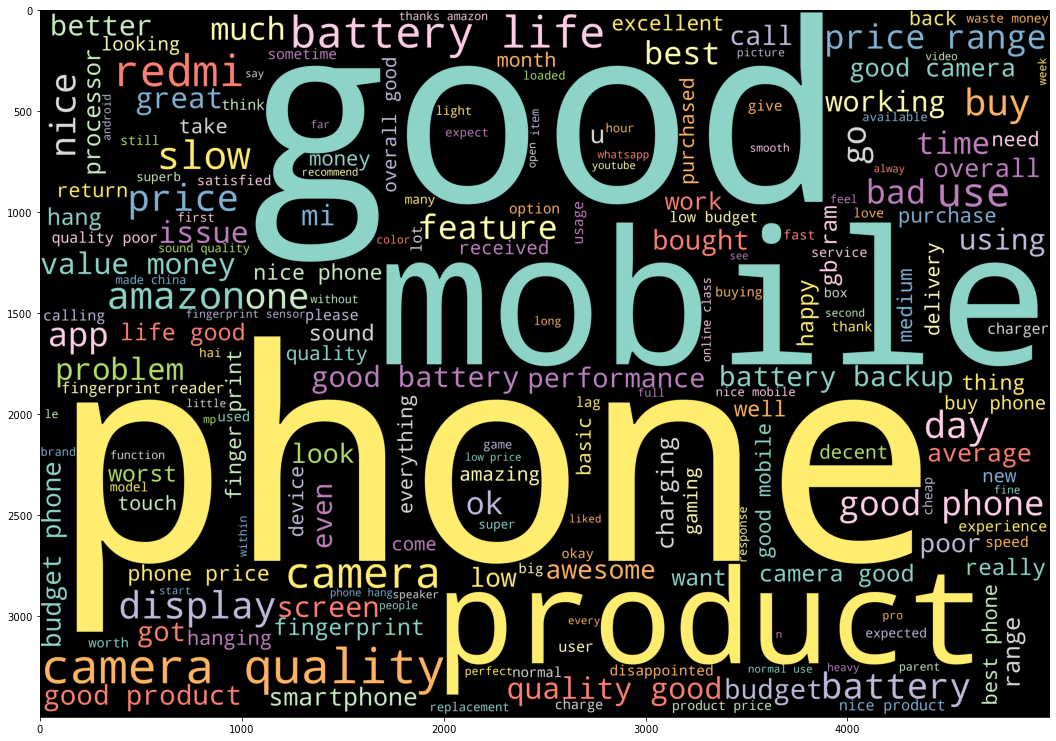

In [34]:
plt.rcParams["figure.figsize"]=(19,13)
plt.imshow(wordcloud)

# Balancing the data

In [35]:
df3

,body,label
index,,
0,Both 13 MP and 5MP Camera quality is good. Hav...,POSITIVE
1,Excellent mobile for daily use @7500/-. Don't ...,POSITIVE
2,If you are looking for low budget phone this c...,NEUTRAL
3,"If I started to rating it's all features, it w...",NEUTRAL
4,Battery is getting drained out quite fast. 7% ...,NEUTRAL
...,...,...
3349,"It is a very good product, in this range . Al...",POSITIVE
3350,Super phone but camera quality is bad,NEUTRAL
3351,Well and goodIt's good for basic usage of andr...,POSITIVE


In [36]:
df3["label"]=df3["label"].map({"POSITIVE":1,"NEGATIVE":-1,"NEUTRAL":0})

In [37]:
cvv=CountVectorizer()
c=cvv.fit_transform(data) # data-> This is cleaned data which comes through the text_transformation function()

In [38]:
x=c 

In [39]:
y=df3["label"]

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
from collections import Counter

In [42]:
oversample = SMOTE()

In [43]:
x, y = oversample.fit_resample(x, y)

In [44]:
counter = Counter(y)
counter

Counter({1: 1645, 0: 1645, -1: 1645})

In [45]:
for k,v in counter.items():
	per = v / len(y) * 100
print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=-1, n=1645 (33.333%)


In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state = 2, shuffle = True, stratify = y)

In [47]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((3306, 4220), (1629, 4220), (3306,), (1629,))

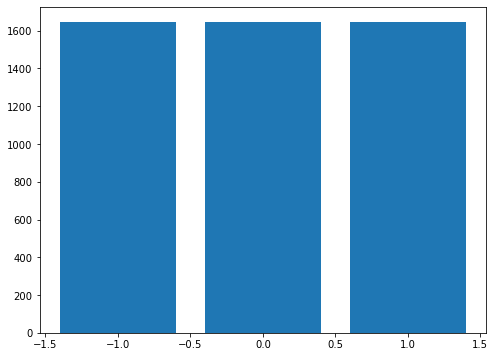

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.bar(counter.keys(), counter.values())
plt.show()
# Balance the data into equal amount

In [49]:
y.value_counts()

 1    1645
 0    1645
-1    1645
Name: label, dtype: int64

# Model'S Building

# Model 1

In [50]:
model1=RandomForestClassifier()
model1.fit(xtrain,ytrain)

RandomForestClassifier()

In [51]:
preds1=model1.predict(xtest)

In [52]:
accuracy_score(ytest,preds1)

0.7802332719459791

# Model 2

In [53]:
model2 = SVC()
model2.fit(xtrain,ytrain) 

SVC()

In [54]:
preds2=model2.predict(xtest)

In [55]:
accuracy_score(ytest,preds2)

0.7740945365254758

# Model 3

In [56]:
model3 = MultinomialNB()
model3.fit(xtrain,ytrain)

MultinomialNB()

In [57]:
preds3=model3.predict(xtest)

In [58]:
accuracy_score(ytest,preds3)

0.6783302639656231

# Model 4

In [59]:
model4 = BernoulliNB()
model4.fit(xtrain,ytrain)

BernoulliNB()

In [60]:
preds4=model4.predict(xtest)

In [61]:
accuracy_score(ytest,preds4)

0.6556169429097606

# Model 5

In [62]:
model5 = KNeighborsClassifier(n_neighbors=11)
model5.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=11)

In [63]:
preds5=model5.predict(xtest)

In [64]:
accuracy_score(ytest,preds5)

0.567219152854512

# Model 6

In [65]:
model6 = DecisionTreeClassifier()
model6.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [66]:
preds6=model6.predict(xtest)

In [67]:
accuracy_score(ytest,preds6)

0.7440147329650092

# Model 7

In [68]:
model7 = LogisticRegression()
model7.fit(xtrain,ytrain)

LogisticRegression()

In [69]:
preds7=model7.predict(xtest)

In [70]:
accuracy_score(ytest,preds7)

0.7630448127685697

In [71]:
a=dict()
a["Randomforest"]=accuracy_score(ytest,preds1)
a["SVC"]=accuracy_score(ytest,preds2)
a["MultinomialNB"]=accuracy_score(ytest,preds3)
a["BernoulliNB"]=accuracy_score(ytest,preds4)
a["KNN"]=accuracy_score(ytest,preds5)
a["Decisiontreeclassifier"]=accuracy_score(ytest,preds6)
a["Logistic"]=accuracy_score(ytest,preds7)

In [72]:
accuracy_table=pd.DataFrame(list(a.items()), columns=["Model","Accuracy"])

In [142]:
acc=accuracy_table.sort_values("Accuracy",ascending=False)
acc

,Model,Accuracy
0,Randomforest,0.780233
1,SVC,0.774095
6,Logistic,0.763045
5,Decisiontreeclassifier,0.744015
2,MultinomialNB,0.678330
3,BernoulliNB,0.655617
4,KNN,0.567219


/Applications/Utilities/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

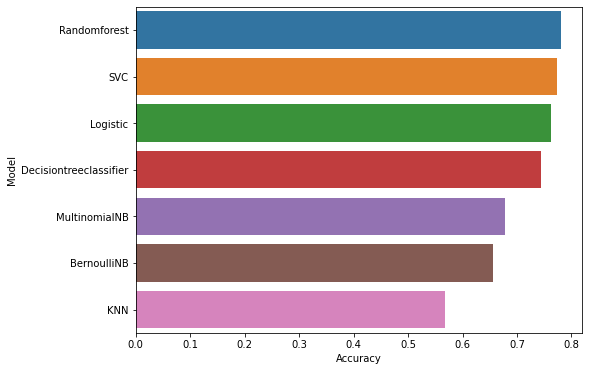

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(acc["Accuracy"],acc["Model"])

In [116]:
b=dict()

b["Randomforest"]=mean_absolute_error(preds1,ytest)
b["SVC"]=mean_absolute_error(preds2,ytest)
b["MultinomialNB"]=mean_absolute_error(preds3,ytest)
b["BernoulliNB"]=mean_absolute_error(preds4,ytest)
b["KNN"]=mean_absolute_error(preds5,ytest)
b["DecisionTreeClassifier"]=mean_absolute_error(preds6,ytest)
b["Logistic"]=mean_absolute_error(preds7,ytest)

In [117]:
error_tabel=pd.DataFrame(list(b.items()),columns=["Model","Error"])
error_tabel

,Model,Error
0,Randomforest,0.244322
1,SVC,0.252916
2,MultinomialNB,0.392879
3,BernoulliNB,0.419890
4,KNN,0.574586
5,DecisionTreeClassifier,0.286679
6,Logistic,0.262738


In [118]:
err=error_tabel.sort_values("Error",ascending=True)
err

,Model,Error
0,Randomforest,0.244322
1,SVC,0.252916
6,Logistic,0.262738
5,DecisionTreeClassifier,0.286679
2,MultinomialNB,0.392879
3,BernoulliNB,0.419890
4,KNN,0.574586


/Applications/Utilities/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Error', ylabel='Model'>

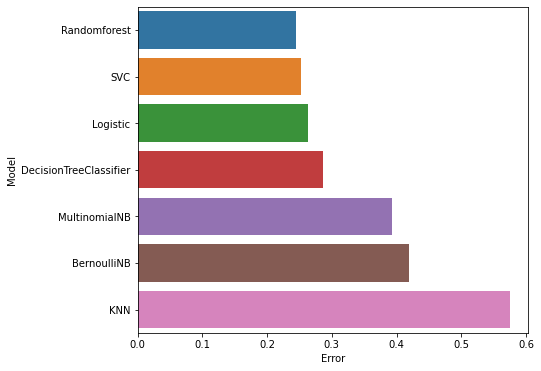

In [119]:
plt.figure(figsize=(7,6))
sns.barplot(err["Error"],err["Model"])

# Checking,,,

In [120]:
def get_2(num):
    if(num==1):
        print("this is positive")
    elif(num==0):
        print("this is nuetral")
    else:
        print("this is negative")

In [121]:
def get_1(text):
    a=text_transformation(text)
    b=cvv.transform(a)
    c=model1.predict(b)
    get_2(c)

In [122]:
input1=["this mobile is looking awesome"]
input2=["this mobile is looking bad"]
input3=["this mobile is looking normal"]

In [123]:
get_1(input1)

this is positive


In [124]:
get_1(input2)

this is negative


In [125]:
get_1(input3)

this is nuetral


# Sentiment Analysis(Emotion Mining)

In [81]:
df5=pd.read_excel("Redmi-9A-Sport.xlsx")

In [82]:
df5=df5.drop(["rating","title"],axis=1)

In [83]:
df5=df5.drop_duplicates()
df5=df5.dropna()
df5.shape

(3354, 1)

In [84]:
text8=[x.strip() for x in df5.body]

In [85]:
text9=' '.join(text8)

In [86]:
sentences=sent_tokenize(text9)

In [87]:
sentences

['Both 13 MP and 5MP Camera quality is good.',
 'Have lot of pre installed apps.',
 'But can be uninstalled if not required.',
 'Overall good performance .',
 'I am using Asus zenfone max and according to me far better than Asus except Camera quality.',
 "It comes in 5000 mah battery and one can't get a better option at this price range.",
 'Go for it.',
 "It's really goodAfter one week useEdit:- please don't buy this phone.",
 'It hangs a lot and sometimes there is problem in touch screen.',
 'Excellent mobile for daily use @7500/-.',
 "Don't belive in negative reviews at all.",
 'If course the product parts made in China, entire assembly, software all are of India.',
 "Even this mobile have no bloat ware or Chinese apps and it's 3gb variant is excellent and black colour looks great.Camera is good at it's price range and has autofocus and AI potrait feature.Regarding battery is really huge and with normal daily usage it lasts for about 24 hrs as of my experience.",
 "With heavy usage 

## Import lexicon(Dictionary)

In [127]:
affin=pd.read_csv("Afinn.csv",encoding='latin1')

In [128]:
affin_dict=affin.set_index("word")["value"].to_dict()

In [129]:
nlp=spacy.load("en_core_web_sm") # for english words

In [130]:
lexicons=affin_dict
def give_sentiment_value(text: str=None):
    sentiment=0
    if text:
        sentence=nlp(text)
    for word in sentence:
        sentiment+=lexicons.get(word.lemma_,0)
        return sentiment

In [131]:
give_sentiment_value("yummy")

3

In [132]:
df5["sentiment"]=df5["body"].apply(lambda body: give_sentiment_value(body))

In [133]:
df5

,body,sentiment
0,Both 13 MP and 5MP Camera quality is good. Hav...,0
1,Excellent mobile for daily use @7500/-. Don't ...,3
2,If you are looking for low budget phone this c...,0
3,"If I started to rating it's all features, it w...",0
4,Battery is getting drained out quite fast. 7% ...,0
...,...,...
3802,"It is a very good product, in this range . Al...",0
3803,Super phone but camera quality is bad,3
3806,Well and goodIt's good for basic usage of andr...,0
3808,Camera is not good,0


In [134]:
df5.describe()

,sentiment
count,3354.000000
mean,0.477042
std,1.291272
min,-3.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.000000


In [135]:
pd.set_option("display.max_rows",None)

## Positive Sentiments

In [136]:
df5[df5["sentiment"]>0].sort_values("sentiment",ascending=False)

,body,sentiment
1634,Superb,5
2436,Superb quality 👍 phone 📱but portrait camera s...,5
3671,"Superb, excellent, fantastic mobile with low p...",5
1201,Superb budget phone with a fantastic cameraI p...,5
1638,Superb camara quality,5
1386,Amazing product,4
204,Wow superb..! 😍 Mobile is so good in this pric...,4
1919,Amazing battery backup,4
2679,Wonderful,4
2668,Awesome phone under 7K. If you're budget is t...,4


## Negative Sentiments

In [137]:
df5[df5["sentiment"]<0].sort_values("sentiment",ascending=True)

,body,sentiment
5,Worst phone.. overall performance is just bakw...,-3
1891,Worst,-3
1868,Worst battery backup . I have been using it fo...,-3
1850,Worst phone ever from redmi. Hangs alot & gett...,-3
1822,Worst camera quality,-3
1804,"Worst product,money loss",-3
1773,Worse camera 😠......made in china mobile,-3
1550,Bad,-3
1485,Horrible product....less than one month of usa...,-3
1380,worst phone to buy. even for parents who does ...,-3


In [138]:
df5["Index_Clone"]=range(0,3354)

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Index_Clone', ylabel='sentiment'>

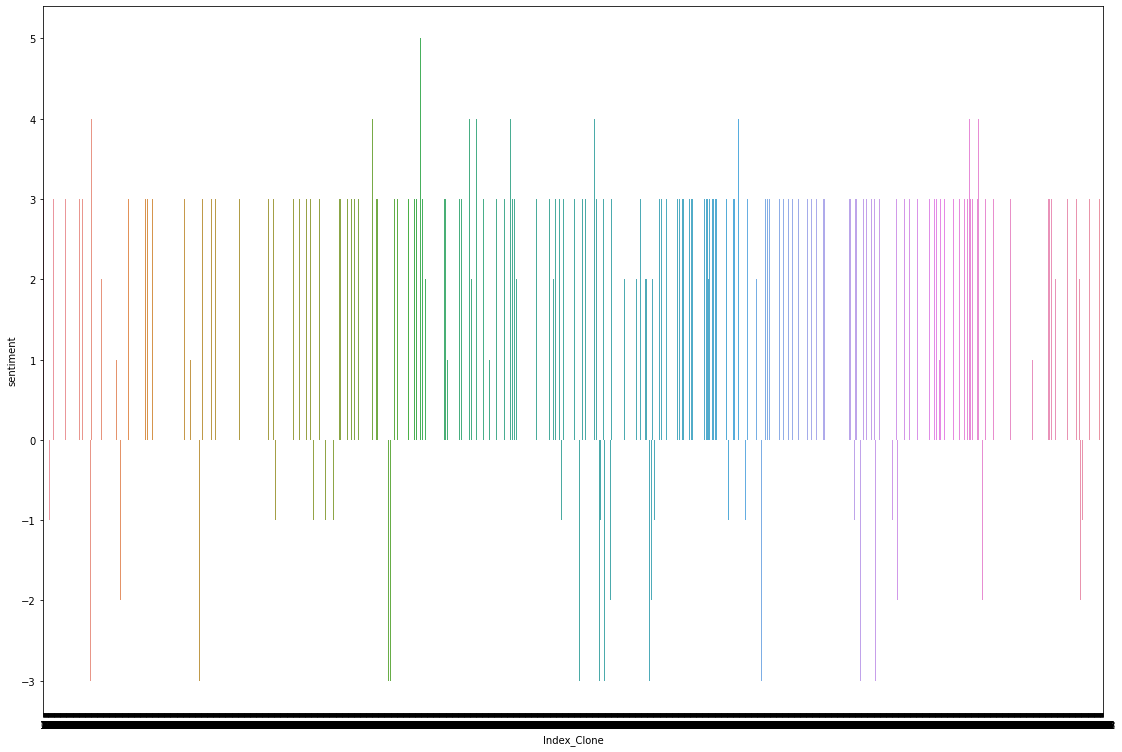

In [139]:
sns.barplot(df5["Index_Clone"],df5["sentiment"])

# OVERALL SENTIMENT,,,

In [140]:
df5["sentiment"].mean()

0.4770423375074538

# The overall sentiment for this Redmi 9A product is positive for us. 